## かめさん講座　機械学習入門
#### 32.XGBoost

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBClassifier

In [3]:
df = sns.load_dataset('titanic')
# XGBoostでは欠損値に対応できている
# df = df.dropna()
X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')]
X = pd.get_dummies(X, drop_first=True)
y = df['survived']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
# 学習
model = XGBClassifier(early_stopping_rounds=10)

In [6]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.179104
[1]	validation_0-error:0.179104
[2]	validation_0-error:0.179104
[3]	validation_0-error:0.179104
[4]	validation_0-error:0.179104
[5]	validation_0-error:0.186567
[6]	validation_0-error:0.186567
[7]	validation_0-error:0.186567
[8]	validation_0-error:0.186567
[9]	validation_0-error:0.186567
[10]	validation_0-error:0.186567
[11]	validation_0-error:0.186567
[12]	validation_0-error:0.186567
[13]	validation_0-error:0.186567
[14]	validation_0-error:0.186567
[15]	validation_0-error:0.186567
[16]	validation_0-error:0.186567
[17]	validation_0-error:0.186567
[18]	validation_0-error:0.186567
[19]	validation_0-error:0.186567
[20]	validation_0-error:0.186567
[21]	validation_0-error:0.182836
[22]	validation_0-error:0.186567
[23]	validation_0-error:0.186567
[24]	validation_0-error:0.190299
[25]	validation_0-error:0.186567
[26]	validation_0-error:0.186567
[27]	validation_0-error:0.182836
[28]	validation_0-error:0.186567
[29]	validation_0-error:0.186567
[30]	validation_0-er

XGBClassifier(early_stopping_rounds=10)

In [11]:
# 予測
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

0.41000516432921275

<BarContainer object of 22 artists>

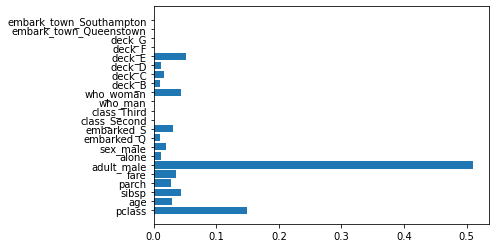

In [12]:
# 特徴量の重要度
model.feature_importances_
plt.barh(X.columns, model.feature_importances_)